### 2, 3. Global and Local Scopes

In [ ]:
print = lambda x: 'hello {0}'.format(x)

In [ ]:
print('Shivon')

'hello Shivon'

In [ ]:
a = 2

In [ ]:
def func1():
    return a

In [ ]:
def func2():
    a = 200

In [ ]:
def func3():
    global a
    a = 300

In [ ]:
func1()

2

In [ ]:
func2(); a

2

In [ ]:
func3(); a

300

In [ ]:
def func4():
    print(a)
    a = 400

Why it doesn't work?

In [ ]:
func4()

UnboundLocalError: local variable 'a' referenced before assignment

**Explain**

1. At compile-time, python looks all the variables in the function and assign `local` or `global` for it. In this case `a` assigned `local` at compile.

2. Then when you run the function, the code execute according to what assigned in the compile-time. Because `a` assigned `local`, so `print(a)` looks for `local` variable named `a`, because it wasn't assign yet => return error.

In [ ]:
def func5():
    global z
    z = 200

Does this works? If no, explain

In [ ]:
func5(); z

200

Does this works? If no, explain

In [ ]:
func()

3

Python namespace lookups

- 1. In the current local scope first
- 2. Local scope
- 3. The global scope in the module
- 4. The built-in scope

### 4, 5. Nonlocal Scopes

##### Lecture

In [ ]:
a = 1

In [ ]:
def outer_func1():
    def inner_func():
        global a
        a = 'hello'
    inner_func()

In [ ]:
outer_func1()

In [ ]:
a

'hello'

In [ ]:
def outer_func():
    x = 'hello'
    
    def inner_func():
        x = 'python'
    
    inner_func()
    print(x)

In [ ]:
outer_func()

hello


In [ ]:
def outer3_func():
    
    x = 'hello'
    # create a inner_func() that modify the value of x to 'shivon'
    def inner_func():
        nonlocal x
        x = 'shivon'
    
    inner_func()
    print(x)

In [ ]:
outer3_func()

shivon


In [ ]:
z = 'x'

In [ ]:
def outer_func4():
    def inner_func():
        nonlocal z
        z = 'shivon'
    
    inner_func()
    print(z)

SyntaxError: no binding for nonlocal 'z' found (4075554184.py, line 3)

In [ ]:
outer_func4()

shivon


In [ ]:
def outer_func5():
    x = 'hello'
    
    def inner1():
        x = 'python'
        def inner2():
            nonlocal x
            x = 'shivon'
        print(f'inner (before): x={x}')
        inner2()
        print(f'inner (after): x={x}')
    inner1()
    print('outer', x)

In [ ]:
outer_func5()

inner (before): x=python
inner (after): x=shivon
outer hello


In [ ]:
def outer_func6():
    x = 'hello'
    
    def inner1():
        nonlocal x
        x = 'python'
        def inner2():
            nonlocal x
            x = 'shivon'
        print(f'inner (before): x={x}')
        inner2()
        print(f'inner (after): x={x}')
    inner1()
    print('outer', x)

In [ ]:
outer_func6()

inner (before): x=python
inner (after): x=shivon
outer shivon


In [ ]:
#k = 'hello'

In [ ]:
def outer_func7():
    k = 'x'
    
    def inner():
        global x
        k = 'shivon'
    
    inner()
    print(k)

In [ ]:
outer_func7()

x


In [ ]:
def outer_func8():
    def inner():
        global j
        j = 'shivon'
    
    inner()
    print(j)

In [ ]:
outer_func8()

shivon


In [ ]:
outer_func9()

x


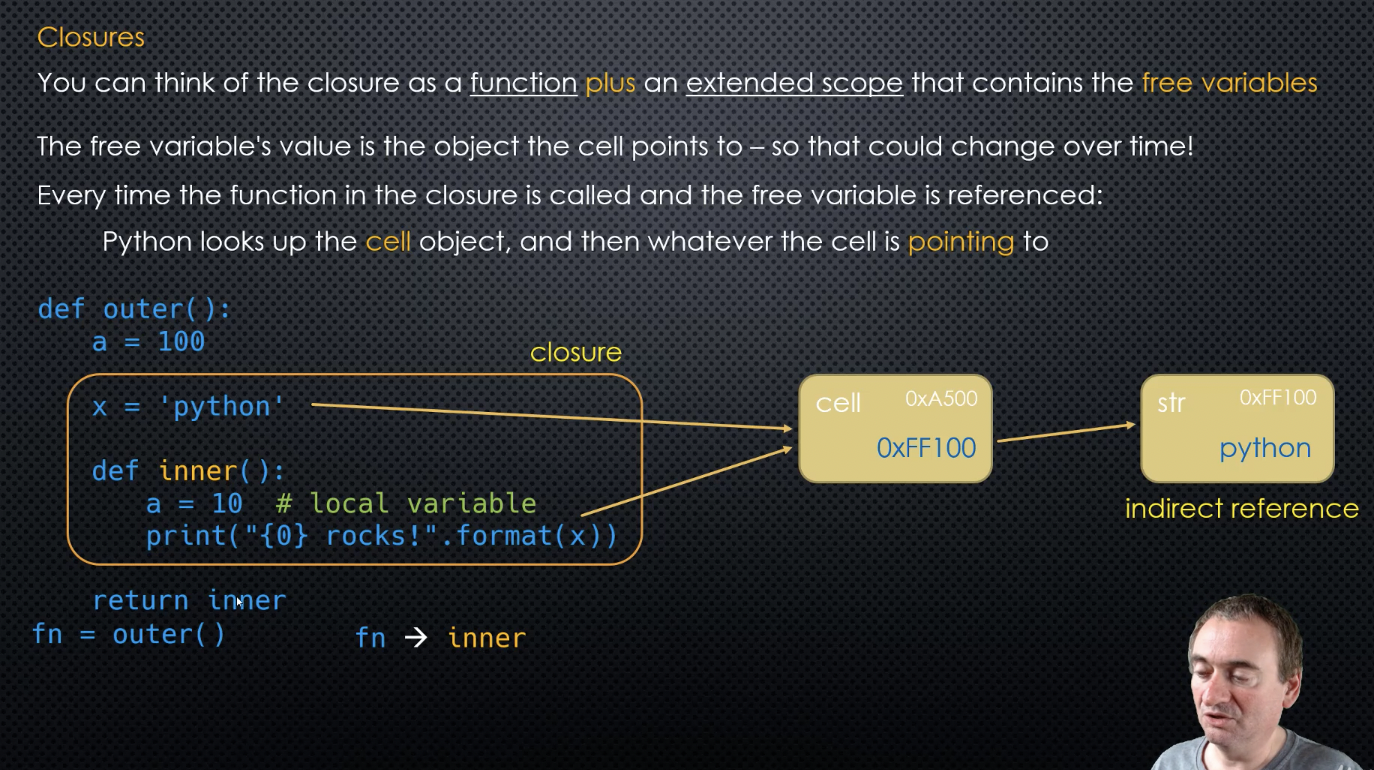

In [ ]:
def outer():
    x = 'python'
    y = 'x'
    def inner():
        print(x, y)
    return inner

In [ ]:
fn = outer()

In [ ]:
fn.__code__.co_freevars

('x', 'y')

In [ ]:
fn.__closure__

(<cell at 0x7fde984efc10: str object>,
 <cell at 0x7fde984ef2e0: str object>)

In [ ]:
def outer7():
    count = 0

    def inc1():
        nonlocal count
        count += 1
        return count
    
    def inc2():
        nonlocal count
        count += 1
        return count
    return inc1, inc2

In [ ]:
f1, f2 = outer7()

In [ ]:
f1()

1

In [ ]:
f1()

2

In [ ]:
f2()

3

In [ ]:
adders = []

In [ ]:
for n in range(1, 4):
    adders.append(lambda x: x + n)

In [ ]:
adders[0](10)

13

In [ ]:
adders[0](11)

14

### 6. Closure

##### Lecture

In [ ]:
def outer():
    name = "Shivon"
    
    def _inner(message):
        return f"{message} {name}"
    
    return _inner

In [ ]:
do_stuff = outer()

In [ ]:
do_stuff("Hello")

'Hello Shivon'

What parameters `do_stuff` takes?

**Answer**: `message`

In [ ]:
def outer2():
    x = 'python'
    def inner():
        print(f'x={x}')
    return inner()

In [ ]:
outer2()

x=python


##### Coding

In [ ]:
def adder(n):
    def inner(x):
        return x + n
    return inner

In [ ]:
add_1 = adder(1)
add_2 = adder(2)

What is the output? Explain why.

In [ ]:
add_1(10) == add_2(10)

False

**Explain**: `False`

Each time the inner function is created, it have a different scope => different variable `n`
- When `add_1 = adder(1)`, a free variable `n` created with value 1
- When `add_2 = adder(2)`, a free variable `n` created with value 2

In [ ]:
adders = []

In [ ]:
for n in range(1, 4):
    adders.append(lambda x: x + n)

What is the output? Explain why.

In [ ]:
adders[0](10) == adders[1](10)

True

**Explain**: `True`

All functions in `adders` shared scope => the same `n`. For the last iteration, the value of `n` changed to `3`. So
- `n` in `adders[0]` is 3
- `n` in `adders[1]` is 3

In [ ]:
def create_adders():
    adders = []
    for n in range(1, 4):
        adders.append(lambda x: x + n)
    return adders

In [ ]:
adders = create_adders()

In [ ]:
adders[0](10) == adders[1](10)

True

In [ ]:
adders[0].__closure__

(<cell at 0x7fde7a9cab80: int object>,)

In [ ]:
adders[1].__closure__

(<cell at 0x7fde7a9cab80: int object>,)

### 10. Decorators

Continue: the lecture